# Brief Walkthrough of Using this Access Model

This notebook serves as a brief explanation of how to use this CyberGIS-Compute model to calculate accessibility using HPC resources. The model is evolving and we are working to make it more robust and user-friendly so this guide may be out of date, but it was last updated 11/12/2024.

[What's CyberGIS-Compute?](https://cybergis.github.io/cybergis-compute-python-sdk/index.html)

## Upload Data

The model requires data to be uploaded, currently it only supports supply data, but we are working to expand this functionality. If you would like to use default data (hospital beds across the U.S.) you can just upload any data, leave the supply filename as the default string, and we will ignore the uploaded data.

Alternatively, you can use your own data and help us catch bugs!

In [ ]:
# install the cybergis-compute client if you need to, but this needs to be run on a CyberGIS-Compute compatible science gateway
# From PyPi
# !pip install --force-reinstall --no-deps cybergis-compute-client

In [1]:
# connect to the CyberGIS-Compute Test server (this model hasn't been added to production yet!)
from cybergis_compute_client import CyberGISCompute
# this line creates 
cybergis = CyberGISCompute(url="cgjobsup-test.cigi.illinois.edu", isJupyter=True, protocol="HTTPS", port=443, suffix="v2")

The current design of the model requires data upload, but if you use the default settings it will ignore the uploaded data and use a sample dataset of hospitals across the conterminous United States. Just select anything as the upload data.

In [2]:
cybergis.show_ui()

📃 Found "cybergis_compute_user.json! NOTE: if you want to login as another user, please remove this file
🎯 Logged in as alexandermichels@cybergisx.cigi.illinois.edu


After the job runs and you download the results under the "Download Job Result" tab, you can use the following code to load the results and plot them:

,ZCTA5CE10,minutes,count in 50,gravity_BEDS,fca_BEDS,2sfca_BEDS,2sfca30_BEDS,g2sfca_BEDS,3sfca_BEDS,raam_BEDS,geometry
0,36083,36.03,5.0,1384.547904,0.009439,0.004197,0.001914,0.001080,0.000225,2.247007,"MULTIPOLYGON (((-85.63225 32.28098, -85.62439 ..."
1,35441,36.19,4.0,1180.943092,0.015776,0.003658,0.001321,0.000542,0.000257,2.125373,"MULTIPOLYGON (((-87.83287 32.84437, -87.83184 ..."
2,35051,30.44,3.0,1295.417245,0.013895,0.001517,0.001072,0.000388,0.000252,2.181544,"POLYGON ((-86.74384 33.25002, -86.73802 33.251..."
3,35121,0.00,4.0,NaN,0.009029,0.000816,0.000654,0.001142,0.001903,1.825418,"POLYGON ((-86.58527 33.94743, -86.58033 33.948..."
4,35058,17.81,1.0,623.245368,0.008746,0.000732,0.001284,0.002058,0.003094,1.987779,"MULTIPOLYGON (((-86.87884 34.21196, -86.87649 ..."


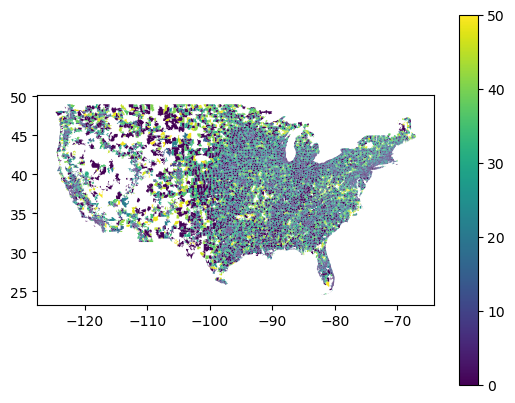

In [5]:
import geopandas as gpd
import os

results = gpd.read_file(os.path.join(cybergis.recentDownloadPath, "access_result.gpkg"))
results.plot(column="minutes", legend=True)
results.head()